### Dataset operations qilishni o'rganamiz

In [1]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = pd.read_csv('datasets/prostate_cancer.txt')

data

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T
...,...,...,...,...,...,...,...,...,...,...,...
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,T
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,T
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,F
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,T


In [3]:
target = 'lpsa'
features = ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']

is_train = data['train'] == 'T'

In [7]:
X, y = data[features].values, data[target].values
X_train, y_train = X[is_train], y[is_train]
X_test, y_test = X[~is_train], y[~is_train]

X_train.shape, X_test.shape

((67, 8), (30, 8))

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R2 Score: ", r2)

Mean squared error:  0.5212740055076022
Mean absolute error:  0.5233719426769028
R2 Score:  0.503379850238179


### Toy dataset creation

y = 2*x

In [32]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

static_seed = 42
np.random.seed(static_seed)

x = np.random.uniform(low=0, high=100, size=(1000, 1))
# y = 2*x
y = 2*x + np.random.normal(loc=0, scale=4, size=(1000,1)) # adding some noise

# X - input, Y - target

data = pd.DataFrame({'X': x.flatten(), 'Y': y.flatten()})

data = shuffle(data, random_state=static_seed)
data.to_csv('datasets/toy_datasets_noisy.csv', index=False)

In [33]:
import pandas as pd

data = pd.read_csv('datasets/toy_datasets_noisy.csv')

data

,X,Y
0,38.089086,80.146341
1,81.659944,165.843135
2,46.267979,97.420092
3,35.609673,73.870870
4,95.006197,184.676291
...,...,...
995,41.038292,84.412297
996,80.936116,159.369980
997,77.552762,155.202401
998,70.096913,145.184795


In [34]:
x = data[['X']]
y = data['Y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R2 Score: ", r2)

Mean squared error:  14.772436986213442
Mean absolute error:  3.048034111553569
R2 Score:  0.9954510797879963


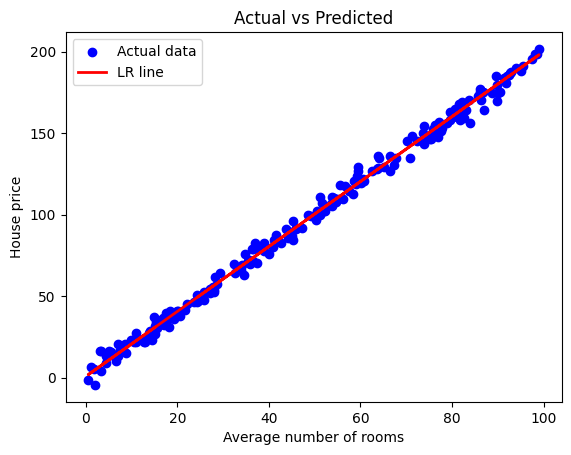

In [35]:
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, color='blue', label='Actual data')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='LR line')
plt.title('Actual vs Predicted')
plt.xlabel('Average number of rooms')
plt.ylabel('House price')
plt.legend()
plt.show()